# Shifting then Tilting HG(0,0)

***
The effect of a tilt to an already misaligned beam of fundamental mode:

$
	\sum_{n,m} u_{nm}(x,y,0)= u_{00(tilt)}(x,y,0)+ \frac{a}{w_0}u_{10(tilt)}(x,y,0) \; .
$

The first term is verified to be

$
	u_{00 (tilt)} \approx u_{00}(x,y,0) + i  \frac{\pi w_{0} \alpha}{\lambda}u_{10} \; .
$

The second term approximates to

$
		\frac{a}{w_0} u_{tilt(1,0)}(x,y,0) 			 
			\approx  
			\frac{a}{w_0} 
			u_{10} 
			 \left[
			1 + i \frac{2 \pi x \alpha}{\lambda} \right] \;.
$

***
Therefore:

$
		u(x,y,0)=
			\left[
				1+
				i \frac{ \pi a \alpha}{ \lambda}
			\right]
			u_{00}
			+
			\left[
				i  \frac{\pi w_{0} \alpha}{\lambda}
			+
			\frac{a}{w_{0}}
			\right]			
			u_{10}
			+
			i  
				\frac{\sqrt{2} \pi a \alpha}{ \lambda}
			u_{20}	.
$





In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.integrate import dblquad

In [2]:
#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-2e-2,2e-2,1000,-1e-3,1e-3,3)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)

wavelength = params.wavelength
w0 = params.w0
E0 = 1   #E field

#scales of each mode
c00_ref = 1
c00 = 1*(1+.04j)
c10 = 0.04*(1+1j)
c20 = 0.04j

#create modes received and reference (rec and ref)
modes_rec = pl.modes((0,0,c00),(1,0,c10),(2,0,c20))
modes_ref = pl.modes((0,0,c00_ref))


#calculate amp. and phase
result_rec = pl.calculate(params, plane, modes_rec, z=0)
result_ref = pl.calculate(params,plane,modes_ref, z=0)


        


## Comparing ref and rec 

predicted shift: 3.996803834887158e-05 [m]
actual shift: 3.199999999999991e-05 [m]


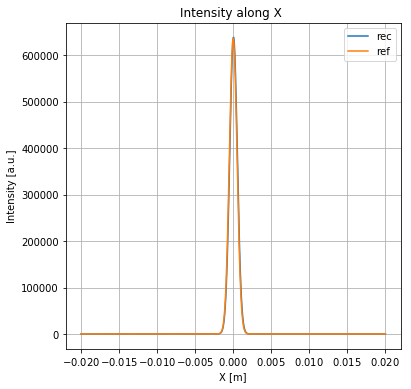

In [3]:
#compare shift to approx.
result_peak = pl.calculate(params, high_res_plane, modes_rec, z=0)
act_shift = pl.PeakInt(result_peak).x[0]

pred_shift = (c10.real*w0)/abs((c00))
print("predicted shift:",pred_shift,'[m]')
print("actual shift:",act_shift,'[m]')

#plot
pl.intslicex(0, result_rec, result_ref, labels=['rec','ref'])



predicted alpha: 1.3547268755982132e-05 [rad]
actual alpha: -2.9278818619764863e-07 [rad]


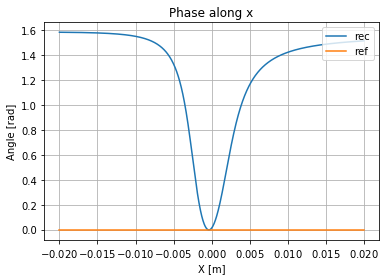

In [4]:
#compare alpha to approx.
theta=wavelength/pl.pi/w0

pred_alpha = theta*abs(c10.imag)

phase_comb=(result_rec.phase[1,:])
phase_diff=(phase_comb[-1]-phase_comb[0])
phase_ang = phase_diff/(plane.getX()[-1]-plane.getX()[0])
act_alpha = phase_ang/2/np.pi*wavelength

#plot
pl.phaseslicex(0, result_rec, result_ref,labels=['rec','ref'])

#results
print("predicted alpha:",pred_alpha,'[rad]')
print("actual alpha:",act_alpha,'[rad]')

## Add ref and rec

In [5]:
#combined (comb)
modes_comb = pl.modes((0,0,c00+c00_ref),(1,0,c10),(2,0,c20))
amp_comb = result_rec.amp+result_ref.amp

result_row = len(amp_comb)
result_col = len(amp_comb[0])
phase_comb = np.zeros((result_row,result_col), dtype=float)
for r in range(result_row):
    for c in range(result_col):
        phase_comb[r,c] = (np.angle(amp_comb[r][c]))

result_comb = pl.Result(params,plane,modes_comb,0,amp_comb,phase_comb)

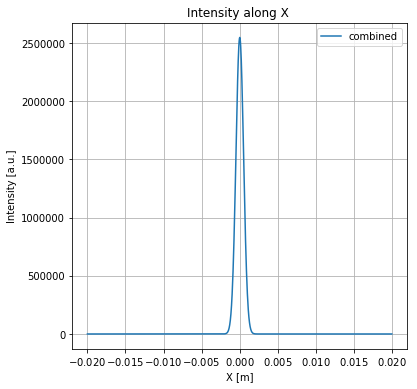

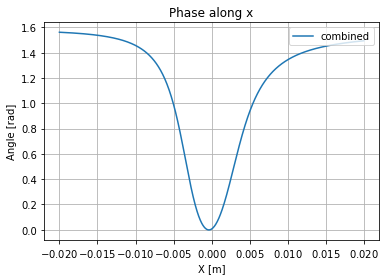

In [6]:
#plot
pl.intslicex(0, result_comb, labels=['combined'])
pl.phaseslicex(0, result_comb,labels=['combined'])

## Photodector 
PD power:
\begin{equation}
	P_{pd}= \int_{- \infty}^{\infty}\int_{- \infty}^{\infty} E^*E \; dxdy,
\end{equation}

Beat note from argument of overlap integral:

\begin{equation}
	\Phi= arg \lbrace \int_{- \infty}^{\infty}\int_{- \infty}^{\infty} U_{ref}(x,y)^*U_{prb}(x,y) \rbrace \; dxdy,
\end{equation}

optopy:

\begin{equation}
	\Phi= arg \lbrace sum( U_{ref}(x,y)^*U_{prb}(x,y) ) \rbrace 
\end{equation}

NameError: name 'combined' is not defined

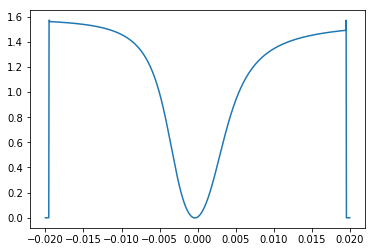

In [21]:
result_row = len(result_ref.amp)
result_col = len(result_ref.amp[0])
beat = np.zeros((result_row,result_col), dtype=float)
for r in range(result_row):
    for c in range(result_col):
        beat[r,c] = np.angle(np.sum(result_ref.amp[r][c].conj()*result_comb.amp[r][c]))

fig=plt.figure()
plt.plot(plane.getX(), beat[1][:])

plt.legend(handles=[combined])
plt.title('Phase along x')
plt.xlabel('X [m]')
plt.ylabel('Angle [rad]')
plt.legend(loc='upper right')

plt.grid()